In [290]:
import numpy as np
import random
import matplotlib.pyplot as plt

## A dummy example of how to numerically solve a system of first-order ODEs with Euler's method


$$
\begin{align}
&\frac{dx}{dt}=+p_1 x + p_2 y - p_3 z\\
&\frac{dy}{dt}=+p_1 x - p_2 y + p_3 z\\
&\frac{dz}{dt}=-p_1 x + p_2 y + p_3 z
\end{align}
$$

In [291]:
def ode_example(sol0,p,tspan=[0,1],dt=0.01):
    
    # sol0 is the initial state of the system
    
    # vector p contains all the fixed parameters
    
    [p1,p2,p3] = p
    
    # define functions to calculate rate of change for each variable
    
    def dx(x,y,z):
        return p1*x  +p2*y -p3*z
    def dy(x,y,z):
        return p1*x  -p2*y +p3*z
    def dz(x,y,z):
        return -p1*x +p2*y +p3*z
    
    # time points where solution should be calculated
    T = np.arange(tspan[0],tspan[-1]+dt,dt)
    
    # initialize the solution arrays
    x = [sol0[0]]
    y = [sol0[1]]
    z = [sol0[2]]
    
    for t in T[0:-1]:
        x.append(x[-1] + dt * dx(x[-1],y[-1],z[-1]))
        y.append(y[-1] + dt * dy(x[-1],y[-1],z[-1]))
        z.append(z[-1] + dt * dz(x[-1],y[-1],z[-1]))
    
    return T,x,y,z

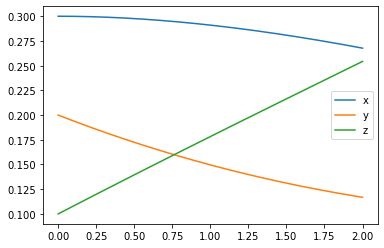

In [292]:
sol0 = [0.3,0.2,0.1] # initial state
tspan = [0,2] # the range of time
dt = 0.001 # time step
p = [-0.1,0.2,0.1] # parameters

T,x,y,z = ode_example(sol0,p,tspan,dt) # solve!

plt.plot(T,x,label="x")
plt.plot(T,y,label="y")
plt.plot(T,z,label="z")
plt.legend()

# plt.plot(u,p) # to plot the trajectory in phase diagram

plt.show()

## The PhoP/PhoQ system

$$
\begin{align}
&\frac{dU}{dt} = k_1 + k_2\frac{P^n}{K^n+P^n}+k_a^-P-(k_d+k_a^+)U\\
&\frac{dP}{dt}=k_a^+U-(k_d+k_a^-)P
\end{align}
$$

Let's go through the terms slowly:

- $U$:
  - $k_1$ describes the rate of the constitutive promoter $P_1$
  - $k_2$ is the rate of the inducible promoter, which has positive feedback from phosphorylated $P$, which we model with a Hill function
  - $U$ phosphorylates to $P$ with rate $k_a^+$
  - $P$ dephosphorylates to $U$ with rate $k_a^-$
  - $U$ degrades with rate $k_d$
- $P$:
  - $U$ phosphorylates to $P$ with rate $k_a^+$
  - $P$ dephosphorylates to $U$ with rate $k_a^-$
  - $P$ degrades with rate $k_d$

In [293]:
## function to solve deterministically using Euler's method

def Pho_ode(sol0,k,n=1,tspan=[0,1],dt=0.01):
    
    [k1,k2,kap,kam,kd,K] = k
    
    def du(u,p):
        return k1 + k2*p**n/(K**n+p**n)+kam*p-(kd+kap)*u
    def dp(u,p):
        return kap*u-(kd+kam)*p
    
    T = np.arange(tspan[0],tspan[-1]+dt,dt)
    u = [sol0[0]]
    p = [sol0[1]]
    
    for t in T[0:-1]:
        u.append(u[-1] + dt * du(u[-1],p[-1]))
        p.append(p[-1] + dt * dp(u[-1],p[-1]))
    
    return T,u,p
    

In [294]:
k1  = 0.01
k2  = 0.3
kap = 5
kam = 20
kd  = 0.08
K   = 0.2
n   = 3
k   = [k1,k2,kap,kam,kd,K]

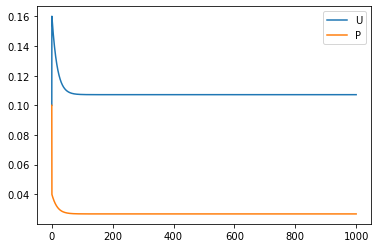

asymtote U 0.10720110201736197 P 0.02669350149834719


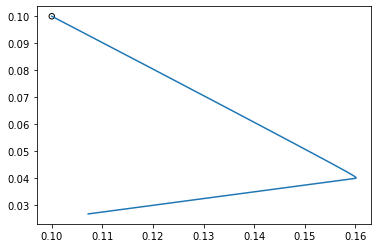

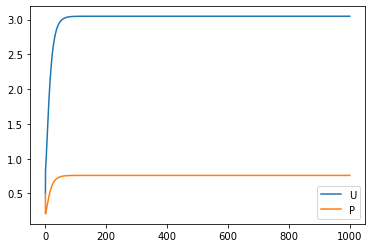

asymtote U 3.0485472765361497 P 0.759100417464178


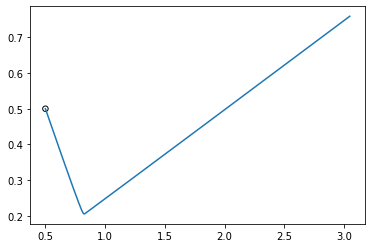

In [295]:
## solving the deterministic ODE
sol0  = [0.1,0.1] # lower equilibrium
sol1  = [0.5,0.5] # higher equilibrium
tspan = [0,1000]
dt    = 0.001

T,u_low,p_low = Pho_ode(sol0,k,n,tspan,dt)
plt.plot(T,u_low,label="U")
plt.plot(T,p_low,label="P")
plt.legend()
plt.show()

U_low_asymtote = u_low[-1]
P_low_asymtote = p_low[-1]
print("asymtote", "U", u_low[-1], "P", p_low[-1])

plt.plot(u_low,p_low) # to plot the trajectory in phase diagram
plt.scatter(u_low[0],p_low[0],facecolors='none', color='k', s=30, label=f'initial (u,p): {u[0], p[0]}') # to plot the trajectory in phase diagram
plt.show()

T,u_high,p_high = Pho_ode(sol1,k,n,tspan,dt)
plt.plot(T,u_high,label="U")
plt.plot(T,p_high,label="P")
plt.legend()
plt.show()

U_high_asymtote = u_high[-1]
P_high_asymtote = p_high[-1]
print("asymtote", "U", u_high[-1], "P", p_high[-1])

plt.plot(u_high,p_high) # to plot the trajectory in phase diagram
plt.scatter(u_high[0],p_high[0],facecolors='none', color='k', s=30, label=f'initial (u,p): {u[0], p[0]}') # to plot the trajectory in phase diagram
plt.show()




Great, now that the inducible promoter is on, $P$ activates the inducible promoter, and the concentrations of both forms of the protein increase. We have
recovered the example on the lecture notes page.

Let's run multiple integrations using different initial conditions. The plot below is a combined phase plane for multiple trajectories, each starting at different initial concentrations of $U$ and $P$ (open circles). The final $U$ and $P$ is marked with a solid black circle:

Text(0.5, 0, 'concentration of U')

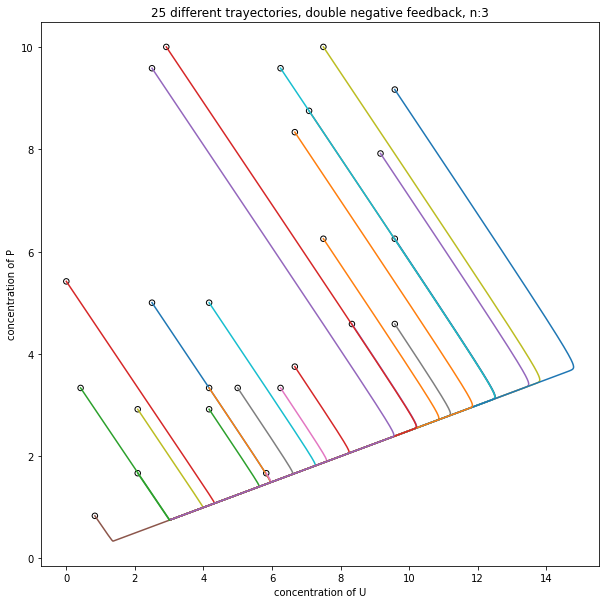

In [296]:
# Generate many trajectories
init_conds = np.linspace(0,10,25)
fig,ax = plt.subplots(ncols= 1,nrows =1)
fig.set_figwidth(10)
fig.set_figheight(10)
n=3

for i in range(25):
    ini  = np.random.choice(init_conds,  2)
    
    u0 = ini[0]
    p0 = ini[1]
    T,u,p = Pho_ode([u0,p0],k,n,tspan,dt)
    
    ax.plot(u,p)
    ax.scatter(u0, p0, facecolors = 'none',edgecolors = 'k', s=30)
    #ax.set_ylim(-0.1,1.1)
     
ax.set_title('25 different trayectories, double negative feedback, n:{}'.format(n));
ax.set_ylabel('concentration of P')
ax.set_xlabel('concentration of U')

Text(0.5, 0, 'concentration of U')

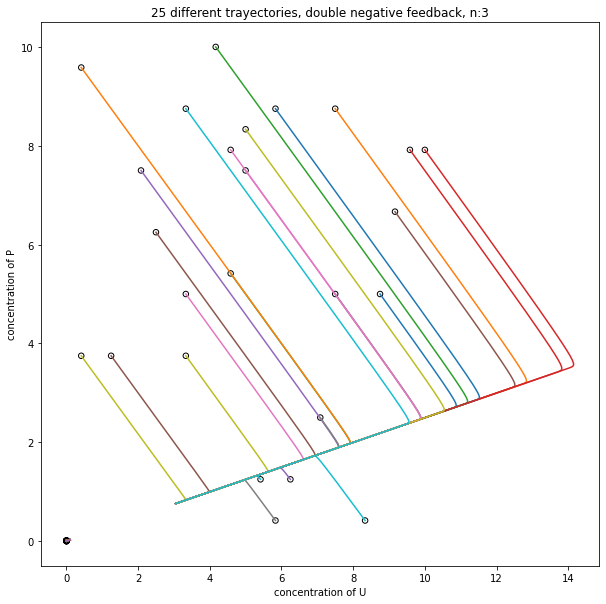

In [297]:
# Generate many trajectories
init_conds_low  = np.linspace(0,0.01,25)
init_conds_high = np.linspace(0,10,25)
fig,ax = plt.subplots(ncols= 1,nrows =1)
fig.set_figwidth(10)
fig.set_figheight(10)
n=3

for i in range(25):
    ini  = np.random.choice(init_conds_low,  2)
    
    u0 = ini[0]
    p0 = ini[1]
    T,u,p = Pho_ode([u0,p0],k,n,tspan,dt)
    
    ax.plot(u,p)
    ax.scatter(u0, p0, facecolors = 'none',edgecolors = 'k', s=30)
    #ax.set_ylim(-0.1,1.1)
    
for i in range(25):
    ini = np.random.choice(init_conds_high, 2)
    
    u0 = ini[0]
    p0 = ini[1]
    T,u,p = Pho_ode([u0,p0],k,n,tspan,dt)
    
    ax.plot(u,p)
    ax.scatter(u0, p0, facecolors = 'none',edgecolors = 'k', s=30)
    #ax.set_ylim(-0.1,1.1)
    
ax.set_title('25 different trayectories, double negative feedback, n:{}'.format(n));
ax.set_ylabel('concentration of P')
ax.set_xlabel('concentration of U')

Nullclines

Differential equations at equilibrium

$$
\begin{align}
&\frac{dU}{dt} = k_1 + k_2\frac{P^n}{K^n+P^n}+k_a^-P-(k_d+k_a^+)U = 0\\
&\frac{dP}{dt}=k_a^+U-(k_d+k_a^-)P = 0
\end{align}
$$

that is

$$
\begin{align}
k_1 + k_2\frac{P^n}{K^n+P^n}+k_a^-P = (k_d+k_a^+)U_1\\
k_a^+U_2 = (k_d+k_a^-)P 
\end{align}
$$

resulting in

$$
\begin{align}
U_1 = \frac{k_1 + k_2\frac{P^n}{K^n+P^n}+k_a^-P}{k_d+k_a^+}\\
U_2 = \frac{k_d+k_a^-}{k_a^+} P
\end{align}
$$

Let's plot the nulclines

In [298]:
def nullclines(k,n):
    [k1,k2,kap,kam,kd,K] = k
    
    print(k,n)
    P = np.linspace(0.000001,100000,500000)
    
    U1 = (k1 + k2*P**n/(K**n+P**n) + kam*P)/(kd+kap)
    U2 = (kd+kam)/kap * P
    
    logU1 = np.log(U1)
    logU2 = np.log(U2)
    logP  = np.log(P)
    return U1, logU1, U2, logU2, P, logP

[0.01, 0.3, 5, 20, 0.08, 0.2] 3


Text(0.5, 0, 'concentration of U')

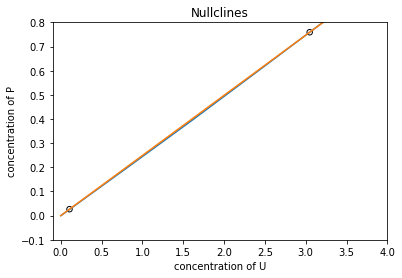

In [306]:
fig,ax = plt.subplots(ncols= 1,nrows =1)
#fig.set_figwidth(10)
#fig.set_figheight(10)

U1,logU1,U2,logU2,P,logP = nullclines(k,3)
#for x in range(2500):
#    print(P[x], U1[x], U2[x])

ax.plot(U1,P)
ax.plot(U2,P)
ax.scatter(U_low_asymtote, P_low_asymtote,  facecolors = 'none',edgecolors = 'k', s=30)
ax.scatter(U_high_asymtote,P_high_asymtote, facecolors = 'none',edgecolors = 'k', s=30)
ax.set_ylim(-0.1,0.8)
ax.set_xlim(-0.1,4.0)
ax.set_title('Nullclines')
ax.set_ylabel('concentration of P')
ax.set_xlabel('concentration of U')

Text(0.5, 0, 'log concentration of U')

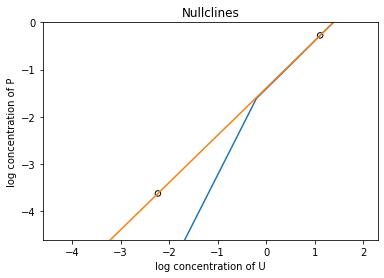

In [303]:
fig,ax = plt.subplots(ncols= 1,nrows =1)
ax.plot(logU1,logP)
ax.plot(logU2,logP)
ax.scatter(np.log(U_low_asymtote), np.log(P_low_asymtote),  facecolors = 'none',edgecolors = 'k', s=30)
ax.scatter(np.log(U_high_asymtote),np.log(P_high_asymtote), facecolors = 'none',edgecolors = 'k', s=30)
ax.set_ylim(np.log(0.01),np.log(1.0))
ax.set_xlim(np.log(0.01),np.log(10.0))
ax.set_title('Nullclines')
ax.set_ylabel('log concentration of P')
ax.set_xlabel('log concentration of U')